In [255]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import numpy as np

In [256]:
df = pd.read_csv("data/recipes.csv")
df = df.fillna(0)
amount_column = pd.DataFrame(df).shape[0]
amount_line = pd.DataFrame(df).shape[1]

print(f'Общее количество колонок в таблице: {amount_column}')
print(f'Общее количество cтрок в таблице: {amount_line}\n')

print("Исходные пропущенные значения:\n", df.isna().sum())

Общее количество колонок в таблице: 87
Общее количество cтрок в таблице: 24

Исходные пропущенные значения:
 drink_type                               0
milk (in cl)                             0
ice cubes                                0
coffee dose (in number of ristrettos)    0
coffee dose (in number of espressos)     0
aroma pumps (=10 ml)                     0
natural fruit extract pumps (=10ml)      0
chocolate pumps (=30 ml)                 0
teaspoon powder (= 5ml)                  0
tablespoon powder (= 15ml)               0
cold brew (in cl)                        0
coco milk (in cl)                        0
infused black tea (in cl)                0
apple juice                              0
fruit packets                            0
freshly pressed orange juice             0
honey (in grams)                         0
whipped cream                            0
speculoos (in ml)                        0
filter coffee (in cl)                    0
coffee (in grams)              

In [257]:
test_size = 0.40
random_state = 42
df["train"] = (np.random.rand(len(df)) < 0.6)


In [258]:
newdf = pd.DataFrame()
newdf["drink_type"] = "Drink " + df["drink_type"] + " " + df["size (mixed drinks)"]
newdf["milk_id"] = df["milk (in cl)"].astype(str).apply(lambda x: "Milk " + x)
newdf["ice_cubes_id"] = df["ice cubes"].astype(str).apply(lambda x: "IceCubes " + x)
newdf["size_id"] = "Size" + df["size (mixed drinks)"].astype(str)
newdf["coffee_dose_ristrettos_id"] = df["coffee dose (in number of ristrettos)"].astype(str).apply(
    lambda x: "CoffeeDoseRistrettos " + x)
print(newdf.head(10))
newdf["coffee_dose_espressos_id"] = df["coffee dose (in number of espressos)"].astype(str).apply(
    lambda x: "CoffeeDoseEspressos " + x)
newdf["aroma_pumps_id"] = df["aroma pumps (=10 ml)"].astype(str).apply(lambda x: "AromaPumps " + x)
newdf["fruit_pump"] = df["natural fruit extract pumps (=10ml)"].astype(str).apply(lambda x: "FruitPump " + x)
newdf["chocolate_pump"] = df["chocolate pumps (=30 ml)"].astype(str).apply(lambda x: "ChocolatePump " + x)
newdf["teaspoon_powder_5"] = df["teaspoon powder (= 5ml)"].astype(str).apply(lambda x: "TeaspoonPower5 " + x)
newdf["teaspoon_powder_15"] = df["tablespoon powder (= 15ml)"].astype(str).apply(lambda x: "TeaspoonPower15 " + x)
newdf["cold_brew"] = df["cold brew (in cl)"].astype(str).apply(lambda x: "ColdBrew " + x)
newdf["coco_milk"] = df["coco milk (in cl)"].astype(str).apply(lambda x: "CocoMilk " + x)
newdf["black_tea"] = df["infused black tea (in cl)"].astype(str).apply(lambda x: "BlackTea " + x)
newdf["apple_juice"] = df["apple juice"].astype(str).apply(lambda x: "AppleJuice " + x)
newdf["fruit_packets"] = df["fruit packets"].astype(str).apply(lambda x: "FruitPacket " + x)
newdf["orange_juice"] = df["freshly pressed orange juice"].astype(str).apply(lambda x: "OrangeJuice " + x)
newdf["honey"] = df["honey (in grams)"].astype(str).apply(lambda x: "Honey " + x)
newdf["whipped_cream"] = df["whipped cream"].astype(str).apply(lambda x: "WhippedCream " + x)
newdf["whipped_cream"] = df["whipped cream"].astype(str).apply(lambda x: "WhippedCream " + x)
newdf["speculoos"] = df["speculoos (in ml)"].astype(str).apply(lambda x: "Speculos " + x)
newdf["filer_coffe"] = df["filter coffee (in cl)"].astype(str).apply(lambda x: "FilerCoffe " + x)
newdf["tea_bags"] = df["tea bags"].astype(str).apply(lambda x: "TeaBags " + x)
newdf["size_coffee"] = df["size (coffee)"].astype(str).apply(lambda x: "SizeCoffee " + x)
print(newdf)

                      drink_type    milk_id   ice_cubes_id     size_id  \
0         Drink frappucino small  Milk 10.0   IceCubes 6.0   Sizesmall   
1        Drink frappucino medium  Milk 10.0   IceCubes 8.0  Sizemedium   
2         Drink frappucino large  Milk 15.0   IceCubes 8.0   Sizelarge   
3     Drink iced chocolate small  Milk 10.0   IceCubes 6.0   Sizesmall   
4    Drink iced chocolate medium  Milk 10.0   IceCubes 8.0  Sizemedium   
5     Drink iced chocolate large  Milk 15.0   IceCubes 8.0   Sizelarge   
6    Drink iced chai latte small  Milk 15.0   IceCubes 6.0   Sizesmall   
7   Drink iced chai latte medium  Milk 20.0   IceCubes 8.0  Sizemedium   
8    Drink iced chai latte large  Milk 25.0  IceCubes 10.0   Sizelarge   
9  Drink milkshake (syrup) small  Milk 15.0   IceCubes 6.0   Sizesmall   

  coffee_dose_ristrettos_id  
0  CoffeeDoseRistrettos 1.0  
1  CoffeeDoseRistrettos 2.0  
2  CoffeeDoseRistrettos 3.0  
3  CoffeeDoseRistrettos 0.0  
4  CoffeeDoseRistrettos 0.0  
5  Co

In [259]:
triples = []

for _, row in newdf.iterrows():
    drink = row["drink_type"]

    for ingredient in newdf.columns[1:]:
        value = row[ingredient]
        print(drink)
        triples.append((drink, "has" + ingredient, value))

for triple in triples:
    print(triple)

Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino small
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappucino medium
Drink frappuci

In [260]:
from ampligraph.evaluation import train_test_split_no_unseen
import numpy as np

# Разделяем данные на обучающую и тестовую выборку
X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=80)
print('Train set size: ', X_train.shape)
print('Test set size: ', X_valid.shape)

Train set size:  (1834, 3)
Test set size:  (80, 3)


In [261]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer

model = ScoringBasedEmbeddingModel(k=100,
                                   eta=20,
                                   scoring_type='ComplEx',
                                   seed=0)

# Optimizer, loss and regularizer definition
optimizer = 'adam'
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})
# Compilation of the model
model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

In [262]:
model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=300,  # Number of training epochs
          verbose=True  # Displays a progress bar.
          )

Epoch 1/300
52/52 [==============================] - 1s 24ms/step - loss: 109.5025
Epoch 2/300
52/52 [==============================] - 0s 3ms/step - loss: 109.3742
Epoch 3/300
52/52 [==============================] - 0s 3ms/step - loss: 109.1601
Epoch 4/300
52/52 [==============================] - 0s 3ms/step - loss: 108.6985
Epoch 5/300
52/52 [==============================] - 0s 3ms/step - loss: 107.6325
Epoch 6/300
52/52 [==============================] - 0s 3ms/step - loss: 105.5189
Epoch 7/300
52/52 [==============================] - 0s 3ms/step - loss: 102.3430
Epoch 8/300
52/52 [==============================] - 0s 3ms/step - loss: 98.8119
Epoch 9/300
52/52 [==============================] - 0s 3ms/step - loss: 95.4879
Epoch 10/300
52/52 [==============================] - 0s 3ms/step - loss: 92.5306
Epoch 11/300
52/52 [==============================] - 0s 2ms/step - loss: 89.9283
Epoch 12/300
52/52 [==============================] - 0s 3ms/step - loss: 87.6873
Epoch 13/300
52/5

In [272]:
ranks = model.evaluate(X_valid,
                       use_filter={'train': X_train,
                                   'test': X_valid},
                       corrupt_side='s,o',
                       verbose=True)

9/9 [==============================] - 1s 77ms/step


In [273]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.77
MR: 1.94
Hits@10: 0.99
Hits@3: 0.91
Hits@1: 0.61


In [274]:
drinks = list(set([row["drink_type"] for index, row in newdf.iterrows()]))
drink_embeddings = dict(zip(drinks, model.get_embeddings(drinks)))

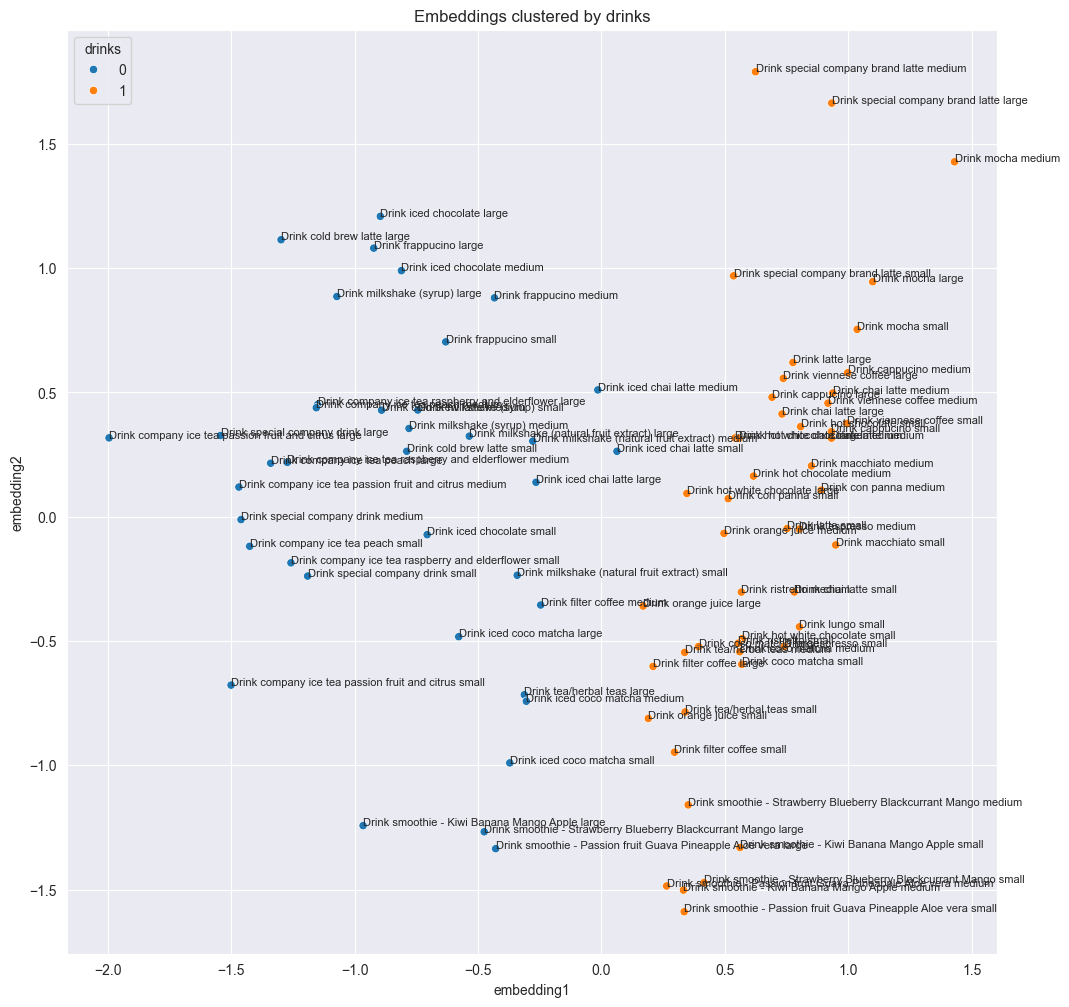

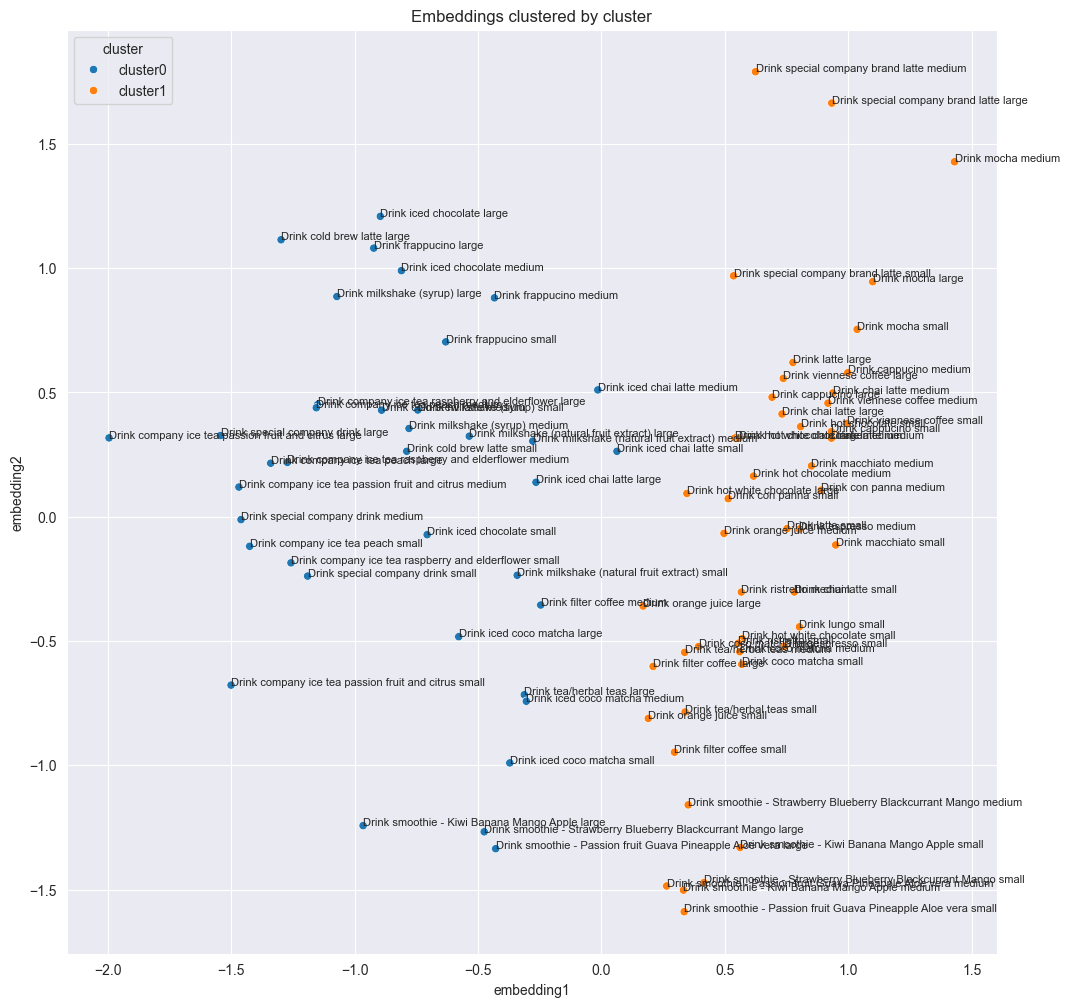

In [276]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from ampligraph.discovery import find_clusters
import matplotlib.pyplot as plt
import seaborn as sns

embeddings_2d = PCA(n_components=2).fit_transform(np.array(list(drink_embeddings.values())))
drinks_array = np.array(drinks)

# Кластеризация
clustering_algorithm = KMeans(n_clusters=2, init="k-means++", n_init=50, max_iter=500)
clusters = find_clusters(drinks_array, model, clustering_algorithm, mode='e')
# Создание DataFrame для визуализации
plot_df = pd.DataFrame({
    "agents": drinks,
    "embedding1": embeddings_2d[:, 0],
    "embedding2": embeddings_2d[:, 1],
    "drinks": clusters,
    "cluster": "cluster" + pd.Series(clusters).astype(str)
})


# Визуализация кластеров
def plot_clusters(hue):
    plt.figure(figsize=(12, 12))
    plt.title(f"Embeddings clustered by {hue}".capitalize())
    sns.scatterplot(data=plot_df, x="embedding1", y="embedding2", hue=hue, palette="tab10")
    for _, point in plot_df.iterrows():
        plt.text(point['embedding1'], point['embedding2'], point["agents"], fontsize=8)
    plt.show()


# Визуализация кластеров по напиткам и результатам кластеризации
plot_clusters("drinks")
plot_clusters("cluster")



